# PCA over the 4 conditions

## Data structure

This dataset contains neural recordings collected from monkeys P and S while they performed an arm reaching task under four different conditions: Control, HFS, FF, and FFHFS. The analyses were conducted separately for each monkey (P and S). During each recording session, one to four neurons were recorded while the monkey was reaching for the same target throughout the session. Although different targets were set for different sessions, we will disregard that information for the following analysis. 

## Pre-processing of the data

The spikes of activity were first convolved with a gaussian kernel of 100 ms for the low-dimension representation of the 4 conditions and the CCGP and 50 ms for the Null Field/FF discrimination.
Only neurons with at least 10 trials for P and 20 for S in all 4 conditions were kept and the data, consisting in a tensor of size ($\#neurons \times \#condition \times \#time bins$) was called $X$. We then selected a time window of size 300 ms for the low-dimensional representation and the CCGP, and 100 ms for the Null Field/FF discrimination task, and then z-scored the data over the condition dimension. $X_{\textrm{z-scored}} = \frac{X - <X>_\textrm{condition}}{\textrm{std}_\textrm{condition}(X)}$. A PCA was then performed on this z-scored data, the plot of the first 3 PCs is represented in the low-dimensional representation of the 4 conditions. 


## 4 conditions discrimination

For this analysis, only the 15 first PCs were kept. We define a test set by taking out half of the trials for each neuron and train a linear classifier thanks to the LinearSVC library to discriminate between Null Field and Force Field under both Control and HFS conditions. The variance of the accuracy resulted from the sampling of the trials. The same number of trials was taken for all conditions.

# Visualizing the the 4 conditions in a low dimensional subspace

## During preparation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors as clr
from functions import *
from mpl_toolkits import mplot3d
import matplotlib.animation as animation
from scipy.spatial.distance import mahalanobis
from matplotlib.lines import Line2D

In [2]:
t = 2700 
window_size = 300
trials_thresh = 20
neur_states_allt = np.load('neur_states_4cond_preparation.npy')

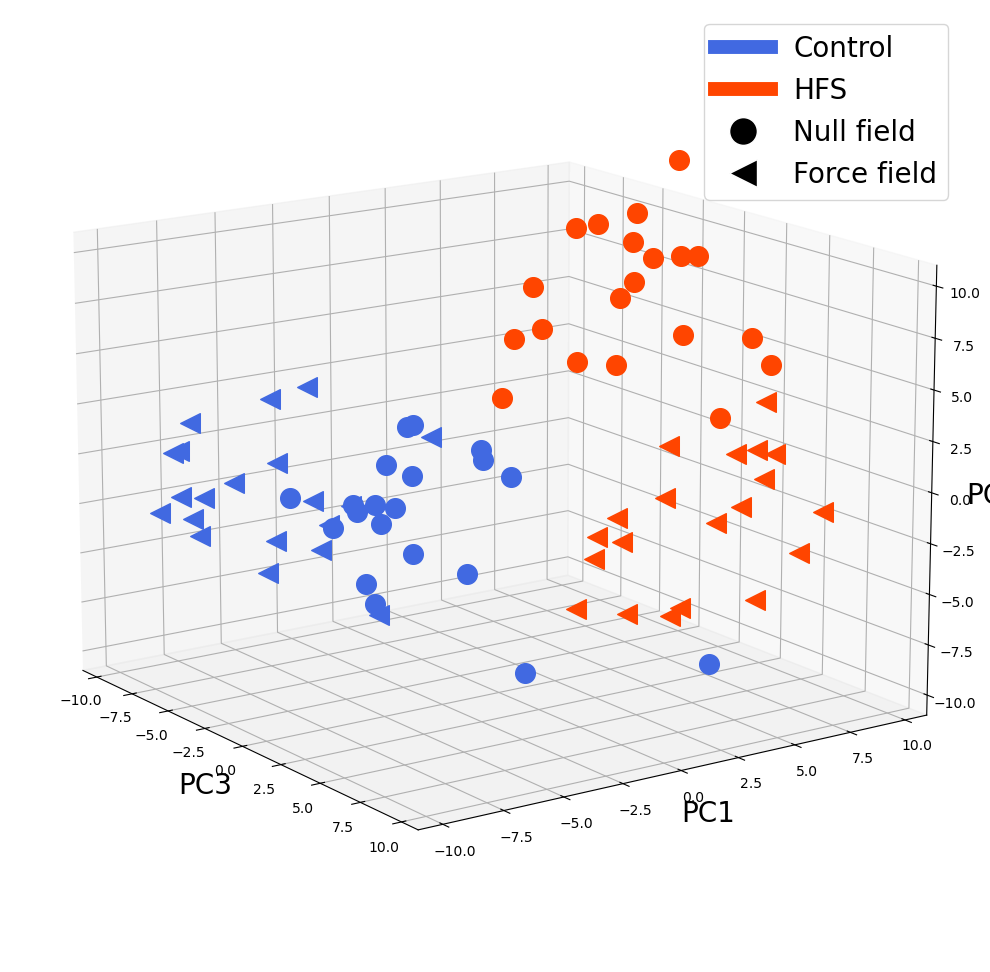

In [3]:
plt.rcParams["figure.autolayout"] = True

N = 50
fps = 120
frn = 10*fps


fig = plt.figure(figsize = (10,10))
colors = ['royalblue', 'orangered', 'royalblue', 'orangered']
lstyles = ['solid', 'solid',  (0, (5, 1)), (0, (5, 1))]
cond_list = ['Cont1', 'HFS', 'FF', 'FF-HFS']
markers = ['o', 'o', '<', '<']
angle = -35
ax = fig.add_subplot(projection='3d')

ax.set_xlabel('PC1', size = 20)
ax.set_ylabel('PC2', size = 20)
ax.set_zlabel('PC3', size = 20)

ax.set_xlim3d(-11,11)
ax.set_ylim3d(-11,11)
ax.set_zlim3d(-11,11)

for i in [0,2,1,3]:
    tr = i*trials_thresh
    
    for k in range(trials_thresh):
        ax.scatter(-neur_states_allt[tr+k,t:t+window_size,0].mean(axis=(0)), -neur_states_allt[tr+k,t:t+window_size,1].mean(axis=(0)), -neur_states_allt[tr+k,t:t+window_size,2].mean(axis=(0)) , marker = markers[i], s = 200,  color=colors[i])
    # Have a dark gradient to reveal depth
    #for k in range(trials_thresh):
        #ax.scatter(neur_states_allt[tr+k,t:t+window_size,0].mean(axis=(0)), neur_states_allt[tr+k,t:t+window_size,1].mean(axis=(0)), -neur_states_allt[tr+k,t:t+window_size,2].mean(axis=(0)) , marker = markers[i], s = 200,  color='k', alpha = alpha_list[tr+k])
        

legend_elements = [Line2D([0], [0], lw=10, color='royalblue', label='Control'),
                   Line2D([0], [0], lw=10, color='orangered', label='HFS'),
                   Line2D([0], [0], marker='o', color='w',markerfacecolor='k', label='Null field',markersize=20),
                   Line2D([0], [0], marker='<', color='w', markerfacecolor='k',label='Force field',markersize=20)]
ax.legend(handles = legend_elements,fontsize = 20)
ax.view_init(15, angle, vertical_axis='y')

#plt.savefig('PCA4'+monkey+'_snapshot_%sto%sms'%(t,t+window_size)+'_20tr.pdf', transparent=True, bbox_inches="tight")

## During movement

In [4]:
t = 3100
window_size = 300
trials_thresh = 20
neur_states_allt = np.load('neur_states_4cond_movement.npy')

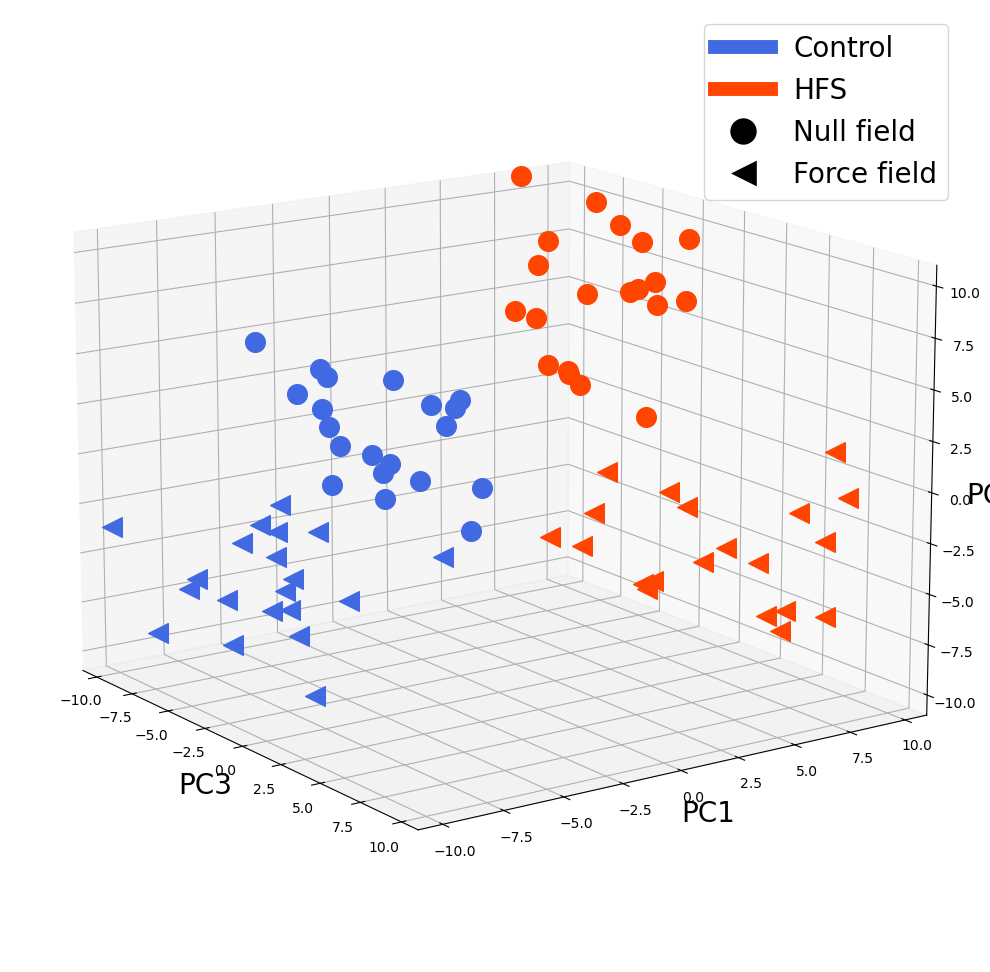

In [5]:
plt.rcParams["figure.autolayout"] = True

N = 50
fps = 120
frn = 10*fps


fig = plt.figure(figsize = (10,10))
colors = ['royalblue', 'orangered', 'royalblue', 'orangered']
lstyles = ['solid', 'solid',  (0, (5, 1)), (0, (5, 1))]
cond_list = ['Cont1', 'HFS', 'FF', 'FF-HFS']
markers = ['o', 'o', '<', '<']
angle = -35
ax = fig.add_subplot(projection='3d')

ax.set_xlabel('PC1', size = 20)
ax.set_ylabel('PC2', size = 20)
ax.set_zlabel('PC3', size = 20)

ax.set_xlim3d(-11,11)
ax.set_ylim3d(-11,11)
ax.set_zlim3d(-11,11)

for i in [0,2,1,3]:
    tr = i*trials_thresh
    
    for k in range(trials_thresh):
        ax.scatter(neur_states_allt[tr+k,t:t+window_size,0].mean(axis=(0)), neur_states_allt[tr+k,t:t+window_size,1].mean(axis=(0)), -neur_states_allt[tr+k,t:t+window_size,2].mean(axis=(0)) , marker = markers[i], s = 200,  color=colors[i])
    # Have a dark gradient to reveal depth
    #for k in range(trials_thresh):
        #ax.scatter(neur_states_allt[tr+k,t:t+window_size,0].mean(axis=(0)), neur_states_allt[tr+k,t:t+window_size,1].mean(axis=(0)), -neur_states_allt[tr+k,t:t+window_size,2].mean(axis=(0)) , marker = markers[i], s = 200,  color='k', alpha = alpha_list[tr+k])
        

legend_elements = [Line2D([0], [0], lw=10, color='royalblue', label='Control'),
                   Line2D([0], [0], lw=10, color='orangered', label='HFS'),
                   Line2D([0], [0], marker='o', color='w',markerfacecolor='k', label='Null field',markersize=20),
                   Line2D([0], [0], marker='<', color='w', markerfacecolor='k',label='Force field',markersize=20)]
ax.legend(handles = legend_elements,fontsize = 20)
ax.view_init(15, angle, vertical_axis='y')

#plt.savefig('PCA4'+monkey+'_snapshot_%sto%sms'%(t,t+window_size)+'_20tr.pdf', transparent=True, bbox_inches="tight")

# Quantifying how far away is Null-Field from FF under Control or HFS condition

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors as clr
from functions import *
from mpl_toolkits import mplot3d
import matplotlib.animation as animation
from scipy.spatial.distance import mahalanobis
from sklearn.svm import LinearSVC
from itertools import *
from tqdm import tqdm
from matplotlib.lines import Line2D
import seaborn as sns
import plotly.graph_objects as go
import pandas as pd

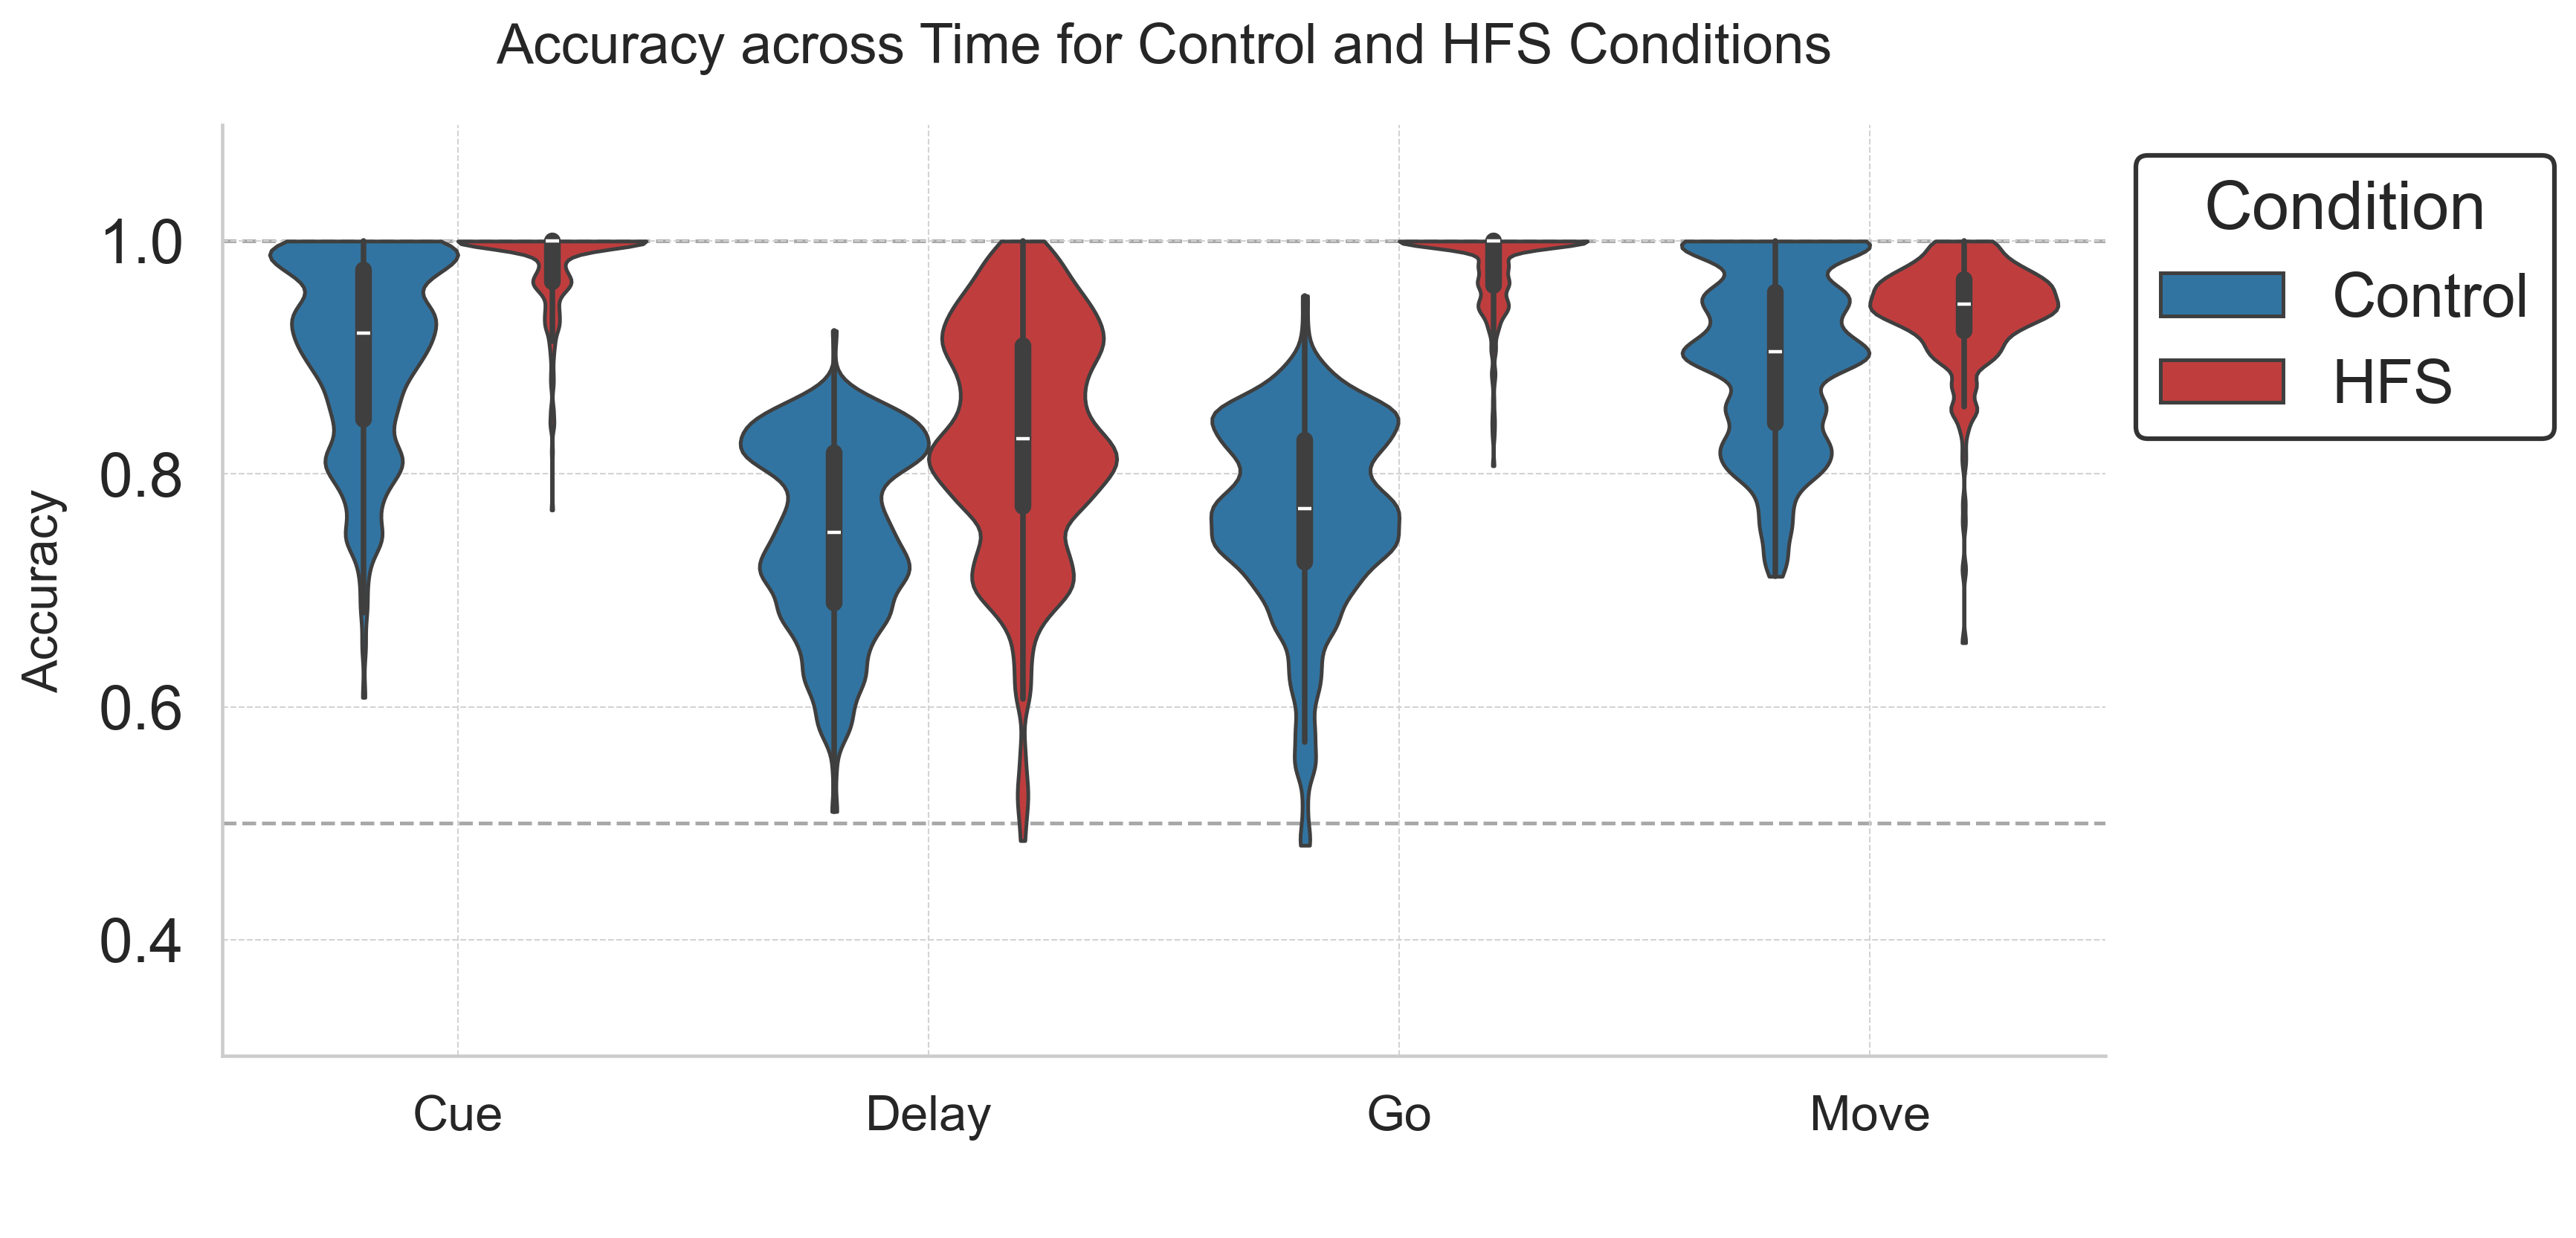

In [7]:
df_tot = pd.read_csv('NF_FF_acc.csv')

times = [2500, 2700, 2950, 3200]


# Set style for a clean and professional look
sns.set(style="whitegrid", context="talk", font_scale=1.2)

# Create a color palette
palette = {"Control": "tab:blue", "HFS": "tab:red"}

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 6), dpi=300)

# Plot the violin plot
sns.violinplot(
    x="Time", y="Accuracy", hue="Condition", data=df_tot, 
    split=False, inner="box", linewidth=1.2, 
    palette=palette, ax=ax, cut = 0, density_norm = 'width', 
)

# Add a dashed horizontal line at y=0.5
ax.axhline(y=0.5, color='darkgrey', linestyle='--', linewidth=1.2, zorder = -1000)
ax.axhline(y=1, color='darkgrey', linestyle='--', linewidth=1.2, zorder = -1000)

# Customize the axes and title
ax.set_title("Accuracy across Time for Control and HFS Conditions", fontsize=18, pad=20)
ax.set_xlabel(" ", fontsize=16, labelpad=10)
ax.set_ylabel("Accuracy", fontsize=16, labelpad=10)
ax.set_ylim(0.3, 1.1)  # Assuming Accuracy is a percentage scaled 0 to 1
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(['Cue', 'Delay', 'Go', 'Move'], fontsize=16)
# Customize legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[:2], labels=labels[:2], title="Condition", 
          loc="best", frameon=True, edgecolor="black", bbox_to_anchor=(1,1))

# Grid and axis aesthetics
ax.grid(visible=True, color="lightgrey", linestyle="--", linewidth=0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.1)
ax.spines['bottom'].set_linewidth(1.1)

# Export the figure with high quality
plt.tight_layout()
#plt.savefig(f'acc_NF_FF_{monkey}_{nb_pcs}PCs_violin_highres1.pdf', format='pdf')
#plt.savefig(f'acc_NF_FF_{monkey}_{nb_pcs}PCs_violin_highres1.svg', format='svg')

# Display the plot
plt.show()